# <center>Grade Prediction Using CART</center>

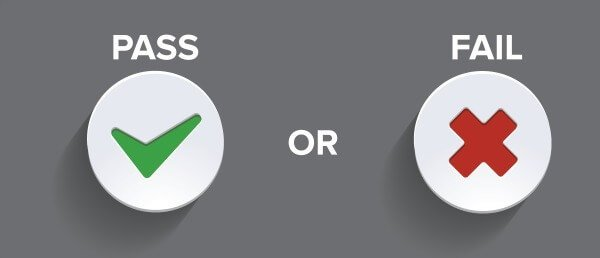

We here come up with a system where student final grade is predicted based on the marks he had scored during his previous course and years. In order to predict the grade of the student we need some data to analyze and to predict the grade. So we will input student basic information and their previous academic information into the system which will be used to predict the grade of the student. We here used an effective data mining algorithm to predict the result.
    To do this, we are going to use the __['Grade Prediction'](https://archive.ics.uci.edu/ml/datasets/student+performance#)__ Dataset.
    The viewers are requested to take a look at __[this paper](http://www3.dsi.uminho.pt/pcortez/student.pdf)__ by the authors of the dataset.

## Table of Content
1. [Import Libraries](#Import-Libraries)
1. [EDA and Graphical Representation](#EDA-and-Graphical-Representation)
1. [Model Building](#Model-Building)
1. [Feature Importance](#Feature-Importance)
1. [Save Model ](#Save-Model)
1. [Advantages](#Advantages)    
1. [Disadvantages](#Disadvantages)    
1. [Conclusion](#Conclusion)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import os

## EDA and Graphical Representation

In [2]:
dataset = pd.read_csv("dataset.csv")    # read dataset

In [3]:
dataset.head()    # head dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
dataset.nunique()    # for unique values in dataset

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [5]:
dataset.isnull().sum()    # sum of missing values in each column

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
dataset.describe()    # summary of dataset

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


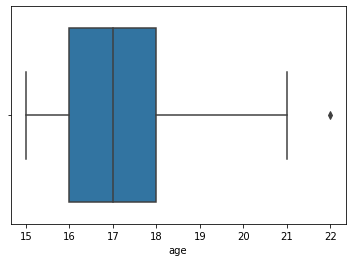

In [7]:
sns.boxplot(x = 'age', data = dataset)    # boxplot

### Interpretation
    From boxplot we say that there is only one outlier in age column.

Text(0, 0.5, 'Grade')

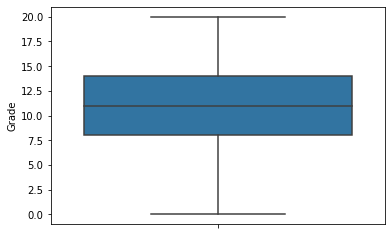

In [8]:
sns.boxplot(y = 'G3', data = dataset)
plt.ylabel("Grade")

### Interpretation
    From above plot we say that there is no outlier.

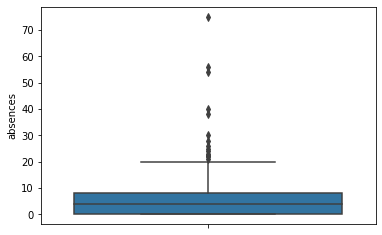

In [9]:
sns.boxplot(y = 'absences', data = dataset)

### Interpretation
    From above plot we say that there is more outliers in absences column. So we replace the outliers by Upper Limit.

In [10]:
# To Compute Quartiles
Q1 = dataset.absences.quantile(0.25)
Q3 = dataset.absences.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

8.0


In [11]:
# Upper Limit
ul = Q3+ 1.5* IQR
ul

20.0

In [12]:
# Replace Outliers by Quartiles
a = []
for i in range(len(dataset.absences)):
    if dataset.absences[i]>=20:
        a.append(20)
    else:
        a.append(dataset.absences[i])

In [13]:
# Assign value to absences column
dataset['absences'] = a

In [14]:
dataset.head().T

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


In [15]:
# Make copy of the dataset
dataset2 = dataset.copy()

In [16]:
# Drop G1 and G2 column cause G3 is average of G1 and G2
dataset2.drop(['G1','G2'], axis = 1, inplace=True)

In [17]:
# Make dummy variables
dataset2 = pd.get_dummies(dataset2, drop_first=True)

In [18]:
# Conversion of Grade into 0 and 1 for classification
b = []
for i in range(len(dataset2.G3)):
    if dataset2.G3[i] <= 11:
        b.append(0)
    else:
        b.append(1)

In [19]:
# Assign binary value to G3 column
dataset2.G3 = b

In [20]:
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [21]:
# Label Encoding
dataset2 = dataset2.apply(LabelEncoder().fit_transform)

In [22]:
dataset2.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,3,4,4,1,1,0,3,2,3,0,...,1,0,1,0,0,0,1,1,0,0
1,2,1,1,0,1,0,4,2,2,0,...,0,0,0,1,0,0,0,1,1,0
2,0,1,1,0,1,3,3,2,1,1,...,1,0,1,0,1,0,1,1,1,0
3,0,4,2,0,2,0,2,1,1,0,...,1,0,0,1,1,1,1,1,1,1
4,1,3,3,0,1,0,3,2,1,0,...,0,0,0,1,1,0,1,1,0,0


In [23]:
dataset2.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,1.696203,2.749367,2.521519,0.448101,1.035443,0.334177,2.944304,2.235443,2.108861,0.481013,...,0.691139,0.081013,0.129114,0.612658,0.458228,0.508861,0.794937,0.949367,0.832911,0.334177
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,...,0.462610,0.273201,0.335751,0.487761,0.498884,0.500555,0.404260,0.219525,0.373528,0.472300
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,3.000000,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,2.000000,3.000000,2.000000,0.000000,1.000000,0.000000,3.000000,2.000000,2.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,3.000000,4.000000,3.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 0, 'Grade')

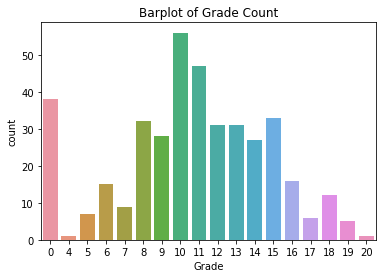

In [24]:
sns.countplot(x="G3", data=dataset)
plt.title("Barplot of Grade Count")
plt.xlabel("Grade")

### Interpretation
    From plot we say that it is bell shaped.

Text(0.5, 0, 'Grade')

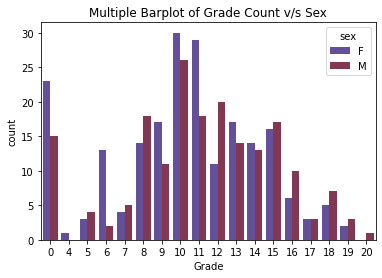

In [25]:
sns.countplot(x="G3",hue="sex", data=dataset, palette="twilight")
plt.title("Multiple Barplot of Grade Count v/s Sex")
plt.xlabel("Grade")

### Interpretation
    From above multiple barplot we say that female count is more than male count upto 11 grade.

Text(0.5, 0, 'Grade')

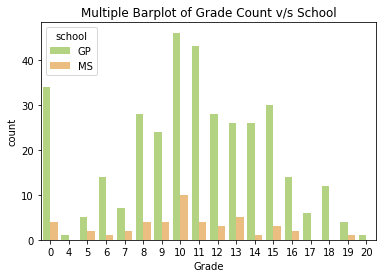

In [26]:
sns.countplot(x="G3",hue="school", data=dataset,palette='RdYlGn_r')
plt.title("Multiple Barplot of Grade Count v/s School")
plt.xlabel("Grade")

### Interpretation
    From above plot we say that GP schools candidates is more than MS schools candidates.

Text(0.5, 0, 'Grade')

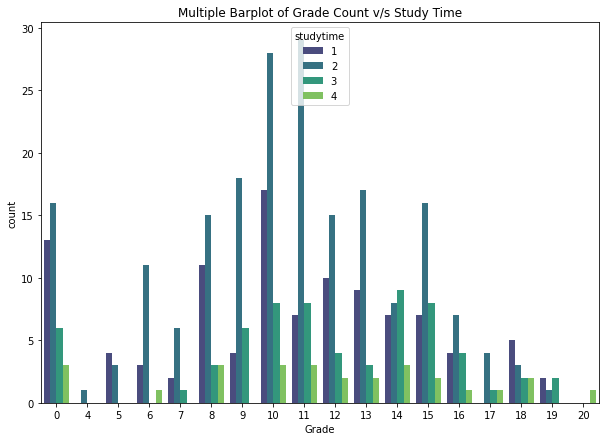

In [27]:
plt.figure(figsize=(10,7))
sns.countplot(x="G3",hue="studytime", data=dataset, palette='viridis')
plt.title("Multiple Barplot of Grade Count v/s Study Time")
plt.xlabel("Grade")

### Interpretation
    From above plot we say that count of student is maximum for study time 2.

Text(0.5, 0, 'Grade')

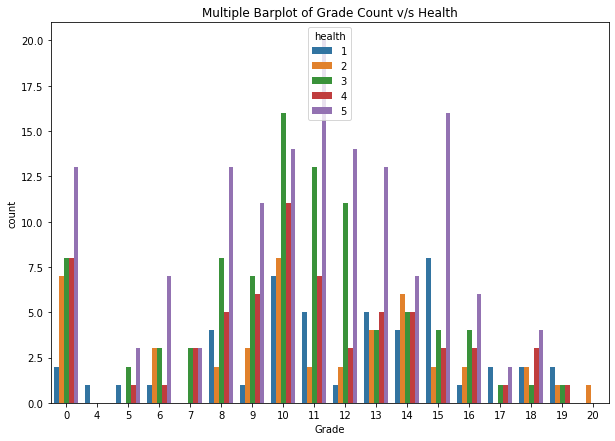

In [28]:
plt.figure(figsize=(10,7))
sns.countplot(x="G3",hue="health", data=dataset)
plt.title("Multiple Barplot of Grade Count v/s Health")
plt.xlabel("Grade")

### Interpretation
    From above plot we say that health level 3 students are more as compare to other health level.

In [29]:
pd.set_option("display.max_columns", None)

In [30]:
dataset2

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,3,4,4,1,1,0,3,2,3,0,0,2,6,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0
1,2,1,1,0,1,0,4,2,2,0,0,2,4,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,0,1,1,0,1,3,3,2,1,1,2,2,10,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0
3,0,4,2,0,2,0,2,1,1,0,0,4,2,1,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1
4,1,3,3,0,1,0,3,2,1,0,1,4,4,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,5,2,2,0,1,2,4,4,3,3,4,3,11,0,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,1,0,0
391,2,3,1,1,0,0,1,3,4,2,3,1,3,1,1,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0
392,6,1,1,0,0,3,4,4,2,2,2,2,3,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
393,3,3,2,2,0,0,3,3,0,2,3,4,0,0,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0


## Model Building

In [31]:
# Select feature and target
x = dataset2.drop('G3',axis=1)
y = dataset2['G3']

In [32]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 101, test_size = 0.1)

#### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(x_train, y_train)
pr = dt.predict(x_test)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

acc = accuracy_score(y_test, pr)
print(" Accuracy Score :", acc)

cm = confusion_matrix(y_test, pr)
print("\n Confusion Matrix :\n", cm)

cr = classification_report(y_test, pr)
print("\n Classification Report :\n", cr)

 Accuracy Score : 0.55

 Confusion Matrix :
 [[17  7]
 [11  5]]

 Classification Report :
               precision    recall  f1-score   support

           0       0.61      0.71      0.65        24
           1       0.42      0.31      0.36        16

    accuracy                           0.55        40
   macro avg       0.51      0.51      0.51        40
weighted avg       0.53      0.55      0.54        40



#### Random Forest 

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(x_train, y_train)
pr = rf.predict(x_test)

acc = accuracy_score(y_test, pr)
print(" Accuracy Score :", acc)

cm = confusion_matrix(y_test, pr)
print("\n Confusion Matrix :\n", cm)

cr = classification_report(y_test, pr)
print("\n Classification Report :\n", cr)

 Accuracy Score : 0.65

 Confusion Matrix :
 [[21  3]
 [11  5]]

 Classification Report :
               precision    recall  f1-score   support

           0       0.66      0.88      0.75        24
           1       0.62      0.31      0.42        16

    accuracy                           0.65        40
   macro avg       0.64      0.59      0.58        40
weighted avg       0.64      0.65      0.62        40



#### XGBoost

In [35]:
from xgboost import XGBClassifier 
my_model = XGBClassifier().fit(x_train, y_train)
   
# Predicting the Test set results 
y_pred = my_model.predict(x_test) 

acc = accuracy_score(y_test, pr)
print(" Accuracy Score :", acc)

cm = confusion_matrix(y_test, pr)
print("\n Confusion Matrix :\n", cm)

cr = classification_report(y_test, pr)
print("\n Classification Report :\n", cr)

 Accuracy Score : 0.65

 Confusion Matrix :
 [[21  3]
 [11  5]]

 Classification Report :
               precision    recall  f1-score   support

           0       0.66      0.88      0.75        24
           1       0.62      0.31      0.42        16

    accuracy                           0.65        40
   macro avg       0.64      0.59      0.58        40
weighted avg       0.64      0.65      0.62        40



In [36]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators'      : [320,330,340],
    'max_depth'         : [8, 9, 10, 11, 12],
    'random_state'      : [0],
    'max_features': ['auto'],
    'criterion' :['gini']
}

grid = GridSearchCV(RandomForestClassifier(), param_grid = param, refit = True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=320, random_state=0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=320, random_state=0, score=0.676, total=   1.0s
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=320, random_state=0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=320, random_state=0, score=0.620, total=   1.0s
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=320, random_state=0 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=320, random_state=0, score=0.648, total=   0.9s
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=320, random_state=0 
[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=320, random_state=0, score=0.620, total=   0.9s
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=320, random_state=0 
[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=320, random_state=0, score=0.676, total=   0.9s
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=330, random_state=0 
[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=330, random_state=0, score=0.676, total=   1.0s
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=330, random_state=0 
[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=330, random_state=0, score=0.620, total=   0.9s
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=330, random

[CV]  criterion=gini, max_depth=10, max_features=auto, n_estimators=340, random_state=0, score=0.634, total=   1.0s
[CV] criterion=gini, max_depth=10, max_features=auto, n_estimators=340, random_state=0 
[CV]  criterion=gini, max_depth=10, max_features=auto, n_estimators=340, random_state=0, score=0.648, total=   1.0s
[CV] criterion=gini, max_depth=11, max_features=auto, n_estimators=320, random_state=0 
[CV]  criterion=gini, max_depth=11, max_features=auto, n_estimators=320, random_state=0, score=0.662, total=   0.9s
[CV] criterion=gini, max_depth=11, max_features=auto, n_estimators=320, random_state=0 
[CV]  criterion=gini, max_depth=11, max_features=auto, n_estimators=320, random_state=0, score=0.606, total=   0.9s
[CV] criterion=gini, max_depth=11, max_features=auto, n_estimators=320, random_state=0 
[CV]  criterion=gini, max_depth=11, max_features=auto, n_estimators=320, random_state=0, score=0.606, total=   0.9s
[CV] criterion=gini, max_depth=11, max_features=auto, n_estimators=3

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  1.2min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [8, 9, 10, 11, 12],
                         'max_features': ['auto'],
                         'n_estimators': [320, 330, 340], 'random_state': [0]},
             verbose=3)

In [37]:
grid.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=320, random_state=0)

In [38]:
grf =  RandomForestClassifier(max_depth=8, n_estimators=320, random_state=0).fit(x_train, y_train)
pred = grf.predict(x_test)

In [39]:
cr = classification_report(y_test, pred)
print(cr)

              precision    recall  f1-score   support

           0       0.72      0.88      0.79        24
           1       0.73      0.50      0.59        16

    accuracy                           0.73        40
   macro avg       0.73      0.69      0.69        40
weighted avg       0.73      0.72      0.71        40



Text(0.5, 1.0, 'Confusion Matrix')

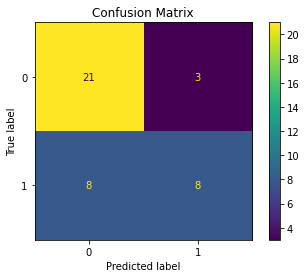

In [40]:
plot_confusion_matrix(grf,x_test, y_test)
plt.title("Confusion Matrix")

Text(0.5, 1.0, 'ROC Curve')

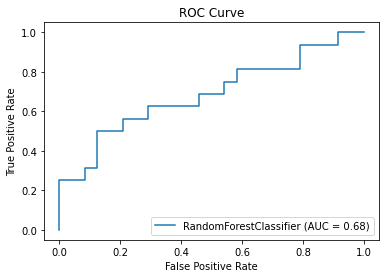

In [41]:
plot_roc_curve(grf,x_test, y_test)
plt.title("ROC Curve")

#### Interpretation
    Here AUC means Area Under Curve is 0.68 which is better than other classifiers.

Text(0.5, 1.0, 'Precision Recall Curve')

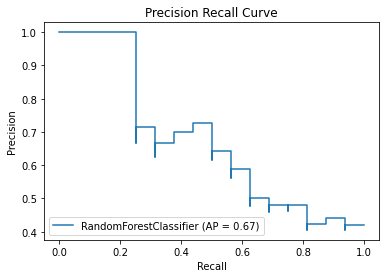

In [42]:
plot_precision_recall_curve(grf, x_test, y_test)
plt.title("Precision Recall Curve")

#### Interpretation
    Here AP means Average Precision is 0.67 which is better than other classifiers.

## Feature Importance

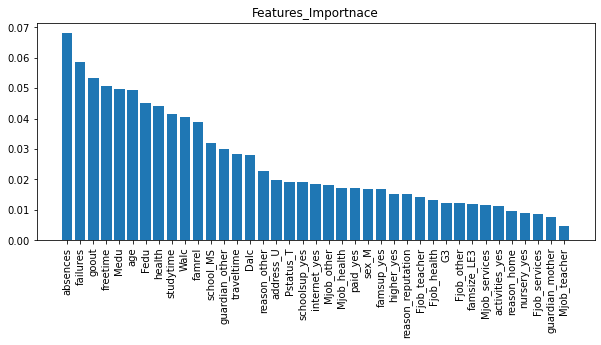

In [43]:
feature_importance = grf.feature_importances_    # Important Features

indices=np.argsort(feature_importance)[::-1]    # Reature importance in descending order
names=[dataset2.columns[:-1][i] for i in indices ]     # Rearrange names


plt.figure(figsize=(10,4))    # Set Figure Size
plt.title("Features_Importnace")    # Add title
plt.bar(range(39), feature_importance[indices])    # Create Barplot
plt.xticks(range(39),names,rotation=90)    # Xticks for each Bar
plt.show()

In [44]:
imp_features = names[:19]
imp_features

['absences',
 'failures',
 'goout',
 'freetime',
 'Medu',
 'age',
 'Fedu',
 'health',
 'studytime',
 'Walc',
 'famrel',
 'school_MS',
 'guardian_other',
 'traveltime',
 'Dalc',
 'reason_other',
 'address_U',
 'Pstatus_T',
 'schoolsup_yes']

In [45]:
new_data = dataset2[imp_features]
new_data['G3'] = dataset2['G3']
new_data.head()

<ipython-input-45-ff71fcbb9ea0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['G3'] = dataset2['G3']


,absences,failures,goout,freetime,Medu,age,Fedu,health,studytime,Walc,famrel,school_MS,guardian_other,traveltime,Dalc,reason_other,address_U,Pstatus_T,schoolsup_yes,G3
0,6,0,3,2,4,3,4,2,1,0,3,0,0,1,0,0,1,0,1,0
1,4,0,2,2,1,2,1,2,1,0,4,0,0,0,0,0,1,1,0,0
2,10,3,1,2,1,0,1,2,1,2,3,0,0,0,1,1,1,1,1,0
3,2,0,1,1,4,0,2,4,2,0,2,0,0,0,0,0,1,1,0,1
4,4,0,1,2,3,1,3,4,1,1,3,0,0,0,0,0,1,1,0,0


In [46]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(new_data.iloc[:,:-1], new_data.iloc[:,-1], test_size = .1, random_state = 101)    # Split dataset into train, test


In [47]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators'      : [320,330,340],
    'max_depth'         : [8, 9, 10, 11, 12],
    'random_state'      : [0],
    'max_features': ['auto'],
    'criterion' :['gini']
}

grid = GridSearchCV(RandomForestClassifier(), param_grid = param, refit = True, verbose = 3)
grid.fit(x_train_new, y_train_new)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=320, random_state=0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=320, random_state=0, score=0.634, total=   0.9s
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=320, random_state=0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=320, random_state=0, score=0.676, total=   0.9s
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=320, random_state=0 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=320, random_state=0, score=0.549, total=   0.9s
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=320, random_state=0 
[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=320, random_state=0, score=0.620, total=   0.9s
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=320, random_state=0 
[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=320, random_state=0, score=0.676, total=   0.9s
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=330, random_state=0 
[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=330, random_state=0, score=0.634, total=   0.9s
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=330, random_state=0 
[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=330, random_state=0, score=0.676, total=   0.9s
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=330, random

[CV]  criterion=gini, max_depth=10, max_features=auto, n_estimators=340, random_state=0, score=0.634, total=   1.0s
[CV] criterion=gini, max_depth=10, max_features=auto, n_estimators=340, random_state=0 
[CV]  criterion=gini, max_depth=10, max_features=auto, n_estimators=340, random_state=0, score=0.648, total=   0.9s
[CV] criterion=gini, max_depth=11, max_features=auto, n_estimators=320, random_state=0 
[CV]  criterion=gini, max_depth=11, max_features=auto, n_estimators=320, random_state=0, score=0.634, total=   0.9s
[CV] criterion=gini, max_depth=11, max_features=auto, n_estimators=320, random_state=0 
[CV]  criterion=gini, max_depth=11, max_features=auto, n_estimators=320, random_state=0, score=0.634, total=   1.0s
[CV] criterion=gini, max_depth=11, max_features=auto, n_estimators=320, random_state=0 
[CV]  criterion=gini, max_depth=11, max_features=auto, n_estimators=320, random_state=0, score=0.592, total=   0.9s
[CV] criterion=gini, max_depth=11, max_features=auto, n_estimators=3

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  1.2min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [8, 9, 10, 11, 12],
                         'max_features': ['auto'],
                         'n_estimators': [320, 330, 340], 'random_state': [0]},
             verbose=3)

In [48]:
grid.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=330, random_state=0)

In [51]:
grf_new =  RandomForestClassifier(max_depth=9, n_estimators=330, random_state=0).fit(x_train_new, y_train_new)
pred_new = grf_new.predict(x_test_new)

In [52]:
cr = classification_report(y_test_new, pred_new)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        24
           1       0.75      0.56      0.64        16

    accuracy                           0.75        40
   macro avg       0.75      0.72      0.73        40
weighted avg       0.75      0.75      0.74        40



Text(0.5, 1.0, 'Confusion Matrix')

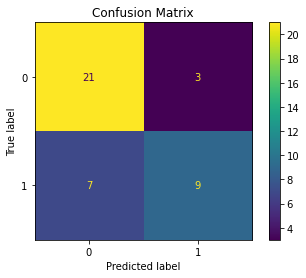

In [54]:
plot_confusion_matrix(grf_new,x_test_new, y_test_new)
plt.title("Confusion Matrix")

Text(0.5, 1.0, 'ROC Curve')

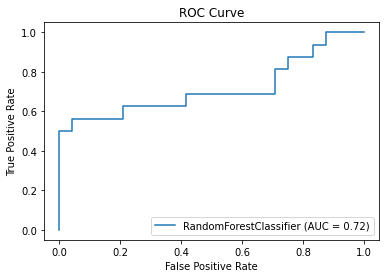

In [55]:
plot_roc_curve(grf_new,x_test_new, y_test_new)
plt.title("ROC Curve")

Text(0.5, 1.0, 'Precision Recall Curve')

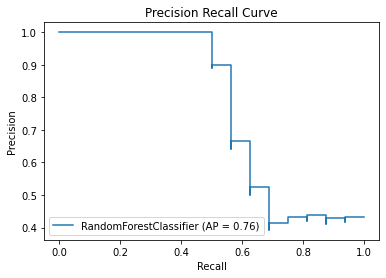

In [56]:
plot_precision_recall_curve(grf_new, x_test_new, y_test_new)
plt.title("Precision Recall Curve")

## Save Model

In [57]:
import joblib

In [58]:
joblib.dump(grf_new, 'Random_Forest_new.pkl')    # save model

['Random_Forest_new.pkl']

## Advantages
1. We can predict students grade from students performance.
2. According to prediction we can assign extra classes or extra coaching for predicted fail studends before final exam.

## Disadvantages
1. The particular student fill the corresponding information which is required for model prediction it gives only 73% accurate in real time.
2. The dataset used in this study is limited with Grade.
3. This project limited between 0 to 7 age group.

## Conclusion
1. Here female count is more than male count upto 11 grade.
2. Here health level 3 students are more as compare to other health level.
3. GP schools candidates is more than MS schools candidates.
4. Distribution of student is maximum for study time 2 hr.
5. Random Forest Classifier is best fit for given dataset.
6. Accuracy is 0.75 and AUC Curve is 0.72